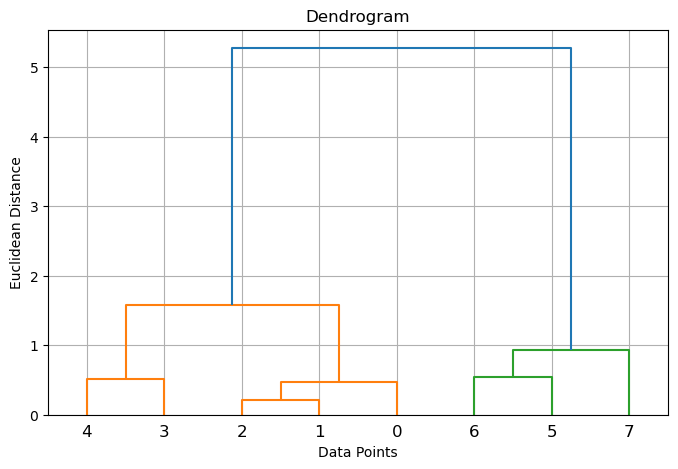

Cluster Labels: [2 2 2 1 1 0 0 0]


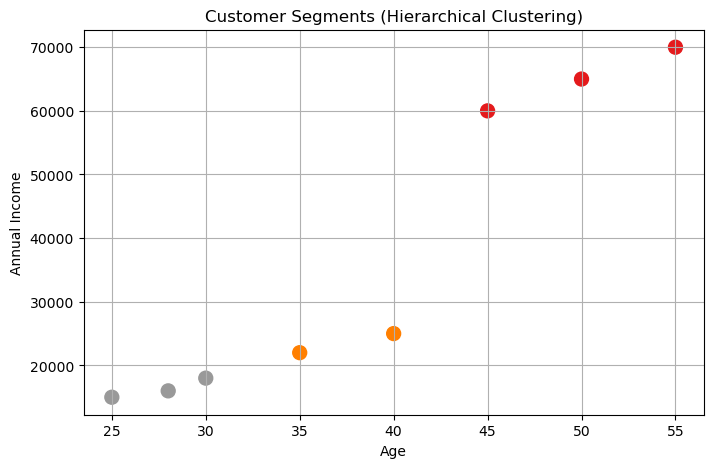

In [1]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# 📊 Create sample data: Age vs Annual Income
data = np.array([
    [25, 15000],
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

# 🧹 Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 🔗 Dendrogram for hierarchical clustering visualization
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

# 🧠 Apply Agglomerative Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hierarchical_cluster.fit_predict(data_scaled)

# 📥 Output cluster labels
print("Cluster Labels:", cluster_labels)

# 🎯 Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='Set1', s=100)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.grid(True)
plt.show()


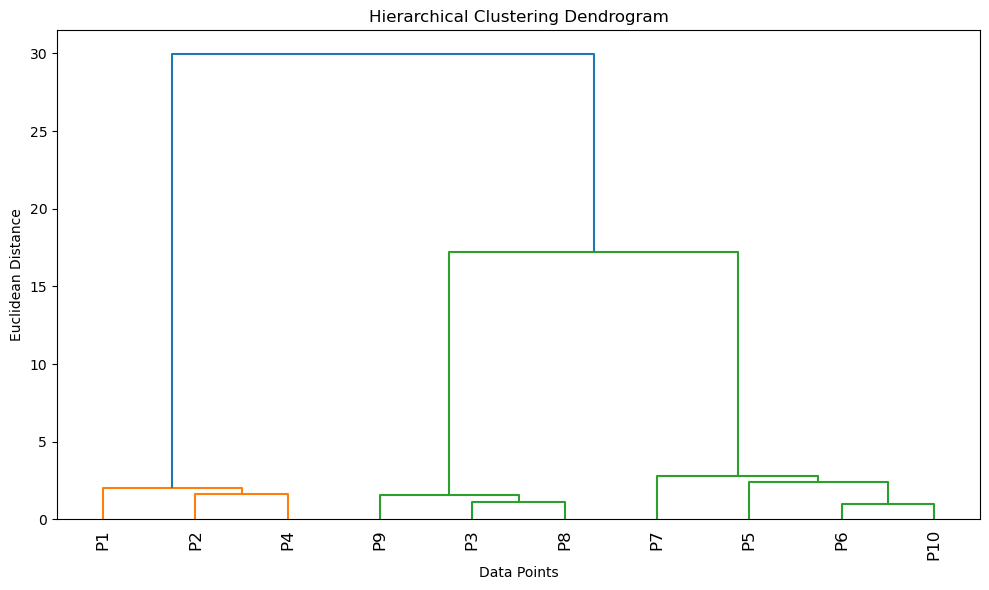

Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# 📊 Generate sample data (10 points, around 3 centers)
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# 🔗 Create linkage matrix using Ward's method
linkage_matrix = linkage(X, method='ward')

# 📈 Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix,
    labels=[f'P{i+1}' for i in range(len(X))],  # Dynamically generate labels P1–P10
    leaf_rotation=90,
    leaf_font_size=12
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

# 🎯 Assign clusters based on distance threshold or number of clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
print("Cluster assignments:", clusters)

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Customer Segmentation export 2025-08-04 10-15-08.csv")

# Show first 5 rows
print(df.head())


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


📌 First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


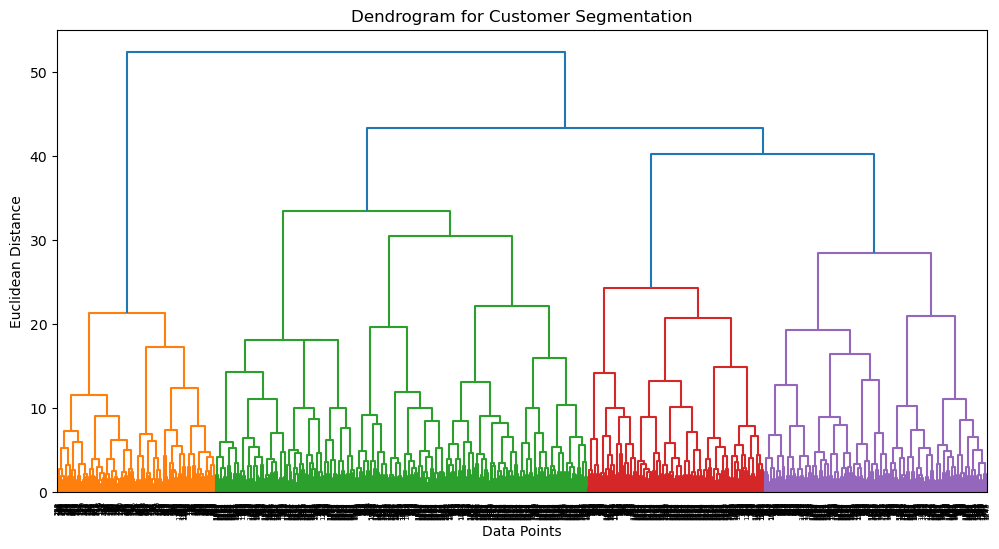


🔎 Cluster Assignments:

Cluster
0          858
2          801
1          341
Name: count, dtype: int64


In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Step 1: Load your data
df = pd.read_csv("Customer Segmentation export 2025-08-04 10-15-08.csv")

# Step 2: Inspect the data
print("📌 First 5 rows of the dataset:")
print(df.head())

# Step 3: Select numeric features for clustering (modify columns as needed)
features = df.select_dtypes(include=['float64', 'int64'])

# Step 4: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Step 5: Plot the Dendrogram to visualize clusters
linkage_matrix = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Customer Segmentation")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 6: Apply Agglomerative Clustering (you can change number of clusters)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agg_cluster.fit_predict(scaled_data)

# Step 7: Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Step 8: Show result
print("\n🔎 Cluster Assignments:\n")
print(df[['Cluster']].value_counts())

# Optional: Save the clustered data
df.to_csv("Clustered_Customers.csv", index=False)